# Creating input dataset for MetSim

Alright, now that you've gotten a feel for how to work with MetSim you may be wondering how to bring in new data.
In this portion of the tutorial we will put together a new MetSim setup for Reynolds Creek.
This is an experimental watershed in southwestern Idaho.
We will be looking at a single location for a year.
The data was downloaded in csv format, which we will transform into NetCDF inputs.
As usual, we begin with some standard imports.

First we check that we loaded correct environment.

In [6]:
conda list metsim

# packages in environment at /Users/amedin/anaconda/envs/pysum:
#
# Name                    Version                   Build  Channel
metsim                    2.2.0                      py_0    conda-forge

Note: you may need to restart the kernel to use updated packages.


Then we load the imports and plot.

Populating the interactive namespace from numpy and matplotlib


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
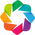

In [7]:
%pylab inline
import cartopy
import geoviews as gv
import geopandas as gpd
import holoviews as hv
import pandas as pd
import xarray as xr
from metsim import MetSim

pylab.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 96
hv.notebook_extension('bokeh')

In [20]:
(gv.tile_sources.StamenTerrainRetina
 * gv.Points([(-116.51, 43.17)]).opts(style=dict(size=16, color='red'))
 * gv.Points([(-122.3321, 49.9),(-122.8443, 47.2529), (-122.5, 42.0)]).opts(style=dict(size=0))
).opts(width=900, height=600)

:Overlay
   .WMTS.I    :WMTS   [Longitude,Latitude]
   .Points.I  :Points   [x,y]
   .Points.II :Points   [x,y]

# Put together the required meteorological data
We've gathered some data form the Reynolds Creek site that we will use as input.
There are two sets of CSVs with precipitation and temperature data, respectively.
We data for 2009 and 2010, and will be generating MetSim input for 2010.
To do this we must first convert it into an `xarray` dataset.
Before doing that though, let's just open up one of the temperature files and see what we're working with.

In [9]:
%%bash
head -n 10 ./reynolds_creek_data/daily/temp_2010.csv
echo ""


Idaho (MST) SNOTEL Site Reynolds Creek - NRCS National Water and Climate Center - Provisional Data - subject to revision as of Tue May 02 13:40:17 GMT-08:00 2017. Notes on dates - Daily sensors (e.g. TAVG.D-1) report a summary value for the previous day.  Hourly sensors (e.g. TAVG.H-1) report a summary value for the previous hour.  Instantaneous sensors (e.g. TOBS.I-1) report a single observation on the hour.

Site Id,Date,Time,TOBS.I-1 (degC) ,TOBS.I-2 (degC) ,TMAX.D-1 (degC) ,TMAX.D-2 (degC) ,TMIN.D-1 (degC) ,TMIN.D-2 (degC) ,TAVG.D-1 (degC) ,TAVG.D-2 (degC) ,
2029,2009-10-01,,     0.0,     0.0,     5.1,     5.1,    -1.9,    -1.9,     1.5,     1.5,
2029,2009-10-02,,    -0.3,    -0.3,    10.1,    10.1,    -4.2,    -4.2,     2.7,     2.7,
2029,2009-10-03,,     4.3,     4.3,    10.6,    10.6,    -0.6,    -0.6,     5.0,     4.9,
2029,2009-10-04,,    -1.5,    -1.5,     6.7,     6.7,    -1.7,    -1.7,     1.4,     1.4,
2029,2009-10-05,,    -0.1,    -0.1,     0.0,     0.0,    -2.2,    -2.2

Here we see that we have several pieces of information to weed through.
Luckily, pandas makes this quite easy. We can load this into a dataframe and easily select out the columns that we want.
As we can see from the header, we are going to be interested in the daily values `TMAX.D-1` and `TMIN.D-1`.
Similarly, the column we are interested in, in the precipitation data is `PREC.I-1`.
So, let's load things up.

## Create the dataset with the relevant dimensions.

In [10]:
dates = pd.date_range('1/1/2010', '12/31/2010')
shape = (len(dates), 1, 1, )
dims = ('time', 'lat', 'lon', )

# We are running only one site, at these coordinates
lats = [43.17]
lons = [-116.51]
elev = 1706.90 # meters
coords = {'time': dates, 'lat': lats, 'lon': lons}

# Create the initial met data input data structure
met_data = xr.Dataset(coords=coords)
met_data

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
  * lat      (lat) float64 43.17
  * lon      (lon) float64 -116.5
Data variables:
    *empty*

## Create the actual data arrays to put the data into.

In [1]:
for varname in ['prec', 't_min', 't_max']:
    met_data[varname] = xr.DataArray(data=np.full(shape, np.nan),
                                     coords=coords, dims=dims,
                                     name=varname)

NameError: name 'xr' is not defined

## Read in the data and put it into the dataset

In [12]:
# Add the precipitation data
df = pd.read_csv("./reynolds_creek_data/daily/precip_2010.csv", skiprows=[0,1])
# Convert to mm
prec_vals = df['PREC.I-1 (in) '].diff().values[1:] * 25.4
met_data['prec'].values[:, 0, 0] = prec_vals

# And now temp data
df = pd.read_csv("./reynolds_creek_data/daily/temp_2010.csv", skiprows=[0,1])
tmin_vals = df['TMIN.D-1 (degC) '].values[1:]
tmax_vals = df['TMAX.D-1 (degC) '].values[1:]
met_data['t_min'].values[:, 0, 0] = tmin_vals
met_data['t_max'].values[:, 0, 0] = tmax_vals

# This is what we have now
met_data.to_netcdf('./input/rc_forcing.nc')
met_data

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 365)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
  * lat      (lat) float64 43.17
  * lon      (lon) float64 -116.5
Data variables:
    prec     (time, lat, lon) float64 0.0 0.0 2.54 15.24 ... 0.0 0.0 0.0 0.0
    t_min    (time, lat, lon) float64 -4.2 -0.6 -1.7 -2.2 ... 15.3 14.1 -99.9
    t_max    (time, lat, lon) float64 10.1 10.6 6.7 0.0 ... 26.1 28.7 24.6 -99.9

# Put together the required domain 

In [13]:
# We form the domain in a similar fashion
# First, by creating the data structure
coords = {'lat': lats, 'lon': lons}
domain = xr.Dataset(coords=coords)
domain['elev'] = xr.DataArray(data=np.full((1,1,), np.nan),
                          coords=coords,
                          dims=('lat', 'lon', ))
domain['mask'] = xr.DataArray(data=np.full((1,1,), np.nan),
                          coords=coords,
                          dims=('lat', 'lon', ))

# Add the data
domain['elev'][0, 0] = elev
domain['mask'][0, 0] = 1
domain.to_netcdf('./input/rc_domain.nc')
domain

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1)
Coordinates:
  * lat      (lat) float64 43.17
  * lon      (lon) float64 -116.5
Data variables:
    elev     (lat, lon) float64 1.707e+03
    mask     (lat, lon) float64 1.0

### Put together the required state

In [14]:
# Finally, we create the state file - the dates are 90 days prior to 
# the MetSim run dates - as usual, create an empty data structure to
# read the data into
dates = pd.date_range('10/3/2009', '12/31/2009')
shape = (len(dates), 1, 1, )
dims = ('time', 'lat', 'lon', )
lats = [43.17]
lons = [-116.51]
elev = 1706.90 # meters
coords = {'time': dates, 'lat': lats, 'lon': lons}
state = xr.Dataset(coords=coords)
for varname in ['prec', 't_min', 't_max']:
    state[varname] = xr.DataArray(data=np.full(shape, np.nan),
                               coords=coords, dims=dims,
                               name=varname)

# Do precip data
df = pd.read_csv("./reynolds_creek_data/daily/precip_2009.csv", skiprows=[0,1])
prec_vals = df['PREC.I-1 (in) '].diff().values[-90:] * 25.4
state['prec'].values[:, 0, 0] = prec_vals

# And now temp data
df = pd.read_csv("./reynolds_creek_data/daily/temp_2009.csv", skiprows=[0,1])
tmin_vals = df['TMIN.D-1 (degC) '].values[-90:]
tmax_vals = df['TMAX.D-1 (degC) '].values[-90:]
state['t_min'].values[:, 0, 0] = tmin_vals
state['t_max'].values[:, 0, 0] = tmax_vals
state.to_netcdf('./input/rc_state.nc')
state

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 90)
Coordinates:
  * time     (time) datetime64[ns] 2009-10-03 2009-10-04 ... 2009-12-31
  * lat      (lat) float64 43.17
  * lon      (lon) float64 -116.5
Data variables:
    prec     (time, lat, lon) float64 2.54 0.0 5.08 0.0 ... 0.0 0.0 0.0 5.08
    t_min    (time, lat, lon) float64 13.1 12.5 13.1 11.9 ... 13.3 1.9 -99.9
    t_max    (time, lat, lon) float64 25.5 26.7 25.9 22.3 ... 25.6 17.3 -99.9

## Registering parameters and building the driver
Now that we've built all of the input files we need, we can run MetSim with our new setup.
Again, we build a simple configuration and run just as we did in the previous notebook.

In [15]:
dates = pd.date_range('1/1/2010', '12/31/2010')
params = {
    'time_step'    : "60",       
    'start'        : dates[0],
    'stop'         : dates[-1],
    'forcing'      : './input/rc_forcing.nc',     
    'domain'       : './input/rc_domain.nc',
    'state'        : './input/rc_state.nc',
    'forcing_fmt'  : 'netcdf',
    'out_dir'      : './output',
    'output_prefix': 'reynolds',
    'scheduler'    : 'threading',
    'chunks'       : 
        {'lat': 1, 'lon': 1},
    'forcing_vars' : 
        {'prec' : 'prec', 't_max': 't_max', 't_min': 't_min'},
    'state_vars'   : 
        {'prec' : 'prec', 't_max': 't_max', 't_min': 't_min'},
    'domain_vars'  : 
        {'elev': 'elev', 'lat': 'lat', 'lon': 'lon', 'mask': 'mask'}
    }               

ms = MetSim(params)
ms.run()
output = ms.open_output().load()

# Let's look at what we've got
First, let's just look at our output by plotting the shortwave for the year.
We can see a clear annual cycle, as we would hope.

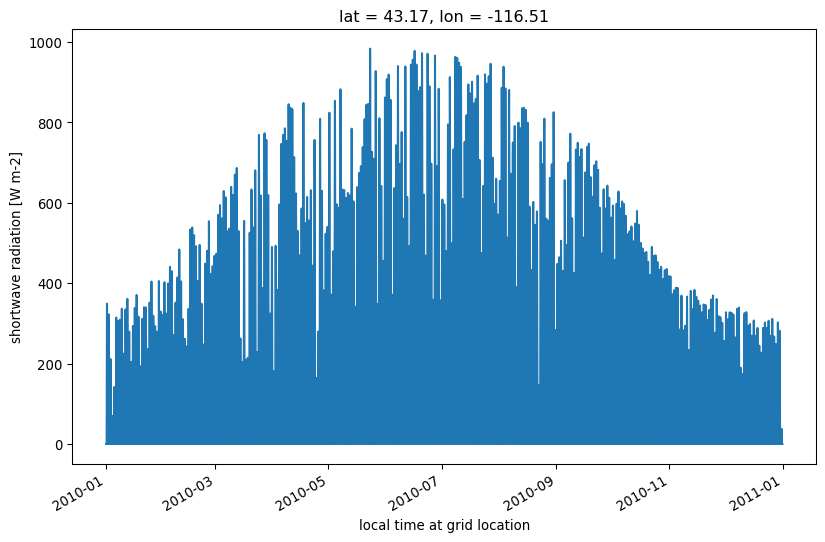

In [16]:
output['shortwave'].plot()

# Finally, a simple comparison against some observations
While we're at it, let's compare how MetSim simulated shortwave radiation to some observations.
We will just look at some for January. 
First, let's load in the observations and plot the two timeseries.
We see that, generally MetSim has the right timing, but is occasionally off on magnitude.
To look at this a little bit further we also show a scatter plot comparing these values.
Again, we see that MetSim and the observations are fairly well correlated, although there is a decent amount of spread.

In [17]:
df = pd.read_csv("./reynolds_creek_data/solar_rad_jan_2010.csv", skiprows=[0,1])
df.head()
df.index = pd.DatetimeIndex(df['Date'] + " " + df['Time'])

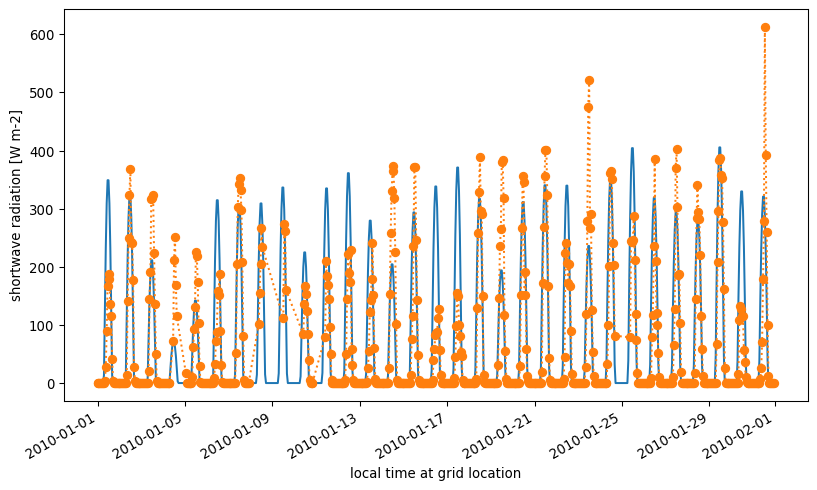

In [18]:
sliced = output.sel(time=slice('01/01/2010', '01/31/2010')).isel(lat=0, lon=0, drop=True)
sliced['shortwave'].plot()
df['SRADV.H-1 (watt) '].plot(marker = 'o', ls=':')

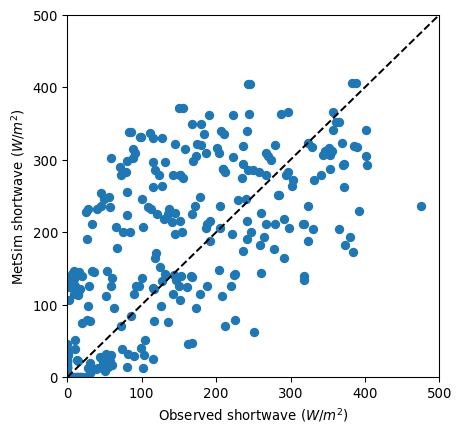

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['SRADV.H-1 (watt) '], sliced['shortwave'].sel(time=df.index))
ax.set_xlabel(r'Observed shortwave $(W/m^2)$')
ax.set_xlim([0,500])
ax.set_ylabel(r'MetSim shortwave $(W/m^2)$')
ax.set_ylim([0,500])
ax.plot([0, 500], [0, 500], color='k', linestyle='--')